In [ ]:
# Import the library
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the training file
data = pd.read_csv('/content/drive/MyDrive/NLP/train.csv')

# Checking the Null values in the dataset.  
print(data.isnull().any(axis = 0))

id                   False
text                 False
is_humor             False
humor_rating          True
humor_controversy     True
offense_rating       False
dtype: bool


In [ ]:
# Load the test data
test_data = pd.read_csv('/content/drive/MyDrive/NLP/gold_test.csv')
print(test_data.isnull().any(axis = 0))
test_data.head(10)

id                   False
text                 False
is_humor             False
humor_rating          True
humor_controversy     True
offense_rating       False
dtype: bool


,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,9001,Finding out your ex got fat is like finding 20...,1,2.20,0.0,0.90
1,9002,"For Brockmann, stereotypes imperil national se...",0,NaN,NaN,0.35
2,9003,A girl runs up to her mother with a pile of cr...,1,2.80,1.0,0.10
3,9004,gotta wonder if baseball still would've been c...,1,2.15,0.0,0.00
4,9005,When you're dreading getting in the shower cuz...,1,2.25,0.0,0.35
5,9006,Parenthood feels like you're on a magical unic...,1,2.00,1.0,0.10
6,9007,It's Friday night and I'm out of control! Gett...,1,2.13,1.0,0.00
7,9008,me: I didn't know this was a hibachi restauran...,1,2.19,1.0,0.80
8,9009,Maybe we need to turn the United States off an...,1,3.06,0.0,0.30
9,9010,I asked my North Korean friend how it was ther...,1,2.63,0.0,1.30


## **Data Preprocessing**

In [ ]:
# Data Pre-Processing on Training data 
data['humor_rating'] = data['humor_rating'].fillna(0)
data['humor_controversy'] = data['humor_controversy'].fillna(0)
data['humor_controversy'] = data['humor_controversy'].apply(np.int64)

In [ ]:
# Data Pre-Processing on Testing data
test_data['humor_rating'] = test_data['humor_rating'].fillna(0)
test_data['humor_controversy'] = test_data['humor_controversy'].fillna(0)
test_data['humor_controversy'] = test_data['humor_controversy'].apply(np.int64)

In [ ]:
# Remove punctuation from text using Regular expression in Training dataset
data['text'] = data['text'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
print(data['text'])

0       TENNESSEE  We re the best state  Nobody even c...
1       A man inserted an advertisement in the classif...
2       How many men does it take to open a can of bee...
3       Told my mom I hit      Twitter followers  She ...
4       Roses are dead  Love is fake  Weddings are bas...
                              ...                        
7995    Lack of awareness of the pervasiveness of raci...
7996      Why are aspirins white  Because they work sorry
7997    Today  we Americans celebrate our independence...
7998    How to keep the flies off the bride at an Ital...
7999     Each ounce of sunflower seeds gives you     o...
Name: text, Length: 8000, dtype: object


In [ ]:
# Remove punctuation from text using Regular expression in Testing dataset
test_data['text'] = test_data['text'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
print(test_data['text'])

0      Finding out your ex got fat is like finding   ...
1      For Brockmann  stereotypes imperil national se...
2      A girl runs up to her mother with a pile of cr...
3      gotta wonder if baseball still would ve been c...
4      When you re dreading getting in the shower cuz...
                             ...                        
995    What do you call a black man on the moon  An a...
996    when im picking someone up and they ask how lo...
997    A black lesbian  an obese white neck beard  an...
998    and I recognize the need to use ALL of my plat...
999    Get married so you can argue about fun things ...
Name: text, Length: 1000, dtype: object


## **Task1(A)** : Humor Detection

In [ ]:
# Preparing training dataset
features = data['text']
labels = data['is_humor']

test_features = test_data['text']
test_labels = test_data['is_humor']

In [ ]:
# Data pre-processing using PorterStemmer
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

test_features = test_features.apply(lambda x: x.split())
test_features = test_features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [ ]:
# Convert text to tfidf vector

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 3462)
features = list(features)
features = tv.fit_transform(features).toarray()

tv2 = TfidfVectorizer(max_features = 3462)

test_features = list(test_features)
test_features = tv2.fit_transform(test_features).toarray()

In [ ]:
# Train-test split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .1, random_state = 0)

In [ ]:
# Store Model performance
train_list = []
test_list = []

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))
train_list.append(lr.score(features_train, labels_train))
print(lr.score(test_features, test_labels))
test_list.append(lr.score(test_features, test_labels))  

0.8995833333333333
0.586


In [ ]:
# Linear SVC
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train))
train_list.append(lsvc.score(features_train, labels_train))
print(lsvc.score(test_features, test_labels))  
test_list.append(lsvc.score(test_features, test_labels))  

0.9602777777777778
0.532


In [ ]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))
train_list.append(gnb.score(features_train, labels_train))
print(gnb.score(test_features, test_labels)) 
test_list.append(gnb.score(test_features, test_labels)) 

0.8069444444444445
0.543


In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train))
train_list.append(rfc.score(features_train, labels_train))
print(rfc.score(test_features, test_labels)) 
test_list.append(rfc.score(test_features, test_labels)) 
# print(rfc.score(features_test, labels_test)) 
# test_list.append(rfc.score(features_test, labels_test)) 

0.9926388888888888
0.391


In [ ]:
# Making list of Model with their performance
classifier_list = ['Logistic Regression', 'Linear SVC', 'Gaussian NB', 'Random Forest']

for i in range(len(train_list)):
  train_list[i] *= 100
  test_list[i] *= 100

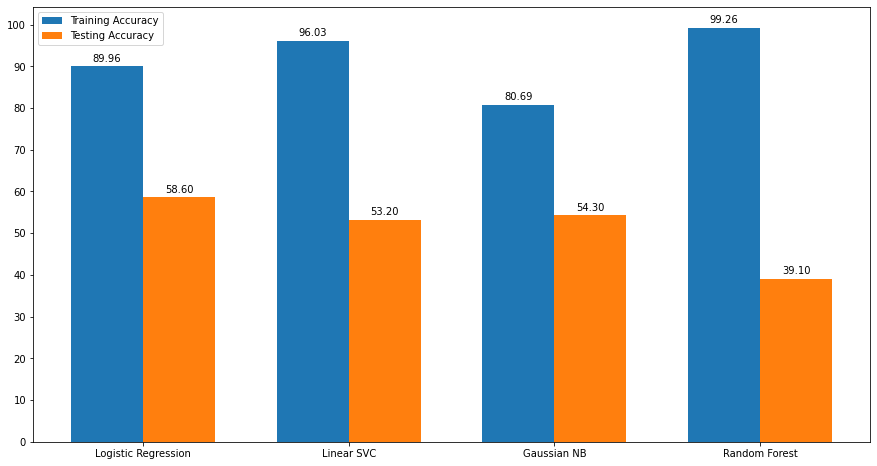

In [ ]:
# Reference : https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/
subjects = ['Logistic Regression', 'Linear SVC', 'Gaussian NB', 'Random Forest']

indx = np.arange(len(subjects))
score_label = np.arange(0, 110, 10)

bar_width = 0.35


fig, ax = plt.subplots(figsize=(15,8))
barMale = ax.bar(indx - bar_width/2, train_list, bar_width, label='Training Accuracy')
barFemale = ax.bar(indx + bar_width/2, test_list, bar_width, label='Testing Accuracy')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subjects)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.2f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)
  

insert_data_labels(barMale)
insert_data_labels(barFemale)

plt.show()

## **Task1(B)** : Humor Rating

In [ ]:
# Preparing dataset and pre-processing

ft = data['text']
lb = data['humor_rating']
ps = PorterStemmer()
ft = ft.apply(lambda x: x.split())
ft = ft.apply(lambda x : ' '.join([ps.stem(word) for word in x]))
tv = TfidfVectorizer(max_features = 3462)
ft = list(ft)
ft = tv.fit_transform(ft).toarray()


ft_test = test_data['text']
lb_test = test_data['humor_rating']
ft_test = ft_test.apply(lambda x: x.split())
ft_test = ft_test.apply(lambda x : ' '.join([ps.stem(word) for word in x]))
tv2 = TfidfVectorizer(max_features = 3462)
ft_test = list(ft_test)
ft_test = tv2.fit_transform(ft_test).toarray()



In [ ]:
# Linear Regression for Humor Rating
lr = LinearRegression()
lr.fit(ft,lb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Score for Model Performance TASK1(B)
print(lr.score(ft,lb))
print(lr.score(ft_test, lb_test))


0.7447205083175488
-6.250448721937112e+23


## **Task1(C)** : Humor Controversy Detection



In [ ]:
# Preparing training dataset
features = data['text']
labels = data['humor_controversy']

test_features = test_data['text']
test_labels = test_data['is_humor']

In [ ]:
# Data pre-processing using PorterStemmer
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

test_features = test_features.apply(lambda x: x.split())
test_features = test_features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [ ]:
# Convert text to tfidf vector

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 3462)
features = list(features)
features = tv.fit_transform(features).toarray()

tv2 = TfidfVectorizer(max_features = 3462)

test_features = list(test_features)
test_features = tv2.fit_transform(test_features).toarray()

In [ ]:
# Train-test split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .1, random_state = 0)

In [ ]:
# Store Model performance
train_list = []
test_list = []

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))
train_list.append(lr.score(features_train, labels_train))
print(lr.score(test_features, test_labels))
test_list.append(lr.score(test_features, test_labels))  

0.7743055555555556
0.393


In [ ]:
# Linear SVC
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train))
train_list.append(lsvc.score(features_train, labels_train))
print(lsvc.score(test_features, test_labels))  
test_list.append(lsvc.score(test_features, test_labels))  

0.8701388888888889
0.468


In [ ]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))
train_list.append(gnb.score(features_train, labels_train))
print(gnb.score(test_features, test_labels)) 
test_list.append(gnb.score(test_features, test_labels)) 

0.5834722222222222
0.402


In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train))
train_list.append(rfc.score(features_train, labels_train))
print(rfc.score(test_features, test_labels)) 
test_list.append(rfc.score(test_features, test_labels)) 

0.9731944444444445
0.394


In [ ]:
# Making list of Model with their performace
classifier_list = ['Logistic Regression', 'Linear SVC', 'Gaussian NB', 'Random Forest']

for i in range(len(train_list)):
  train_list[i] *= 100
  test_list[i] *= 100

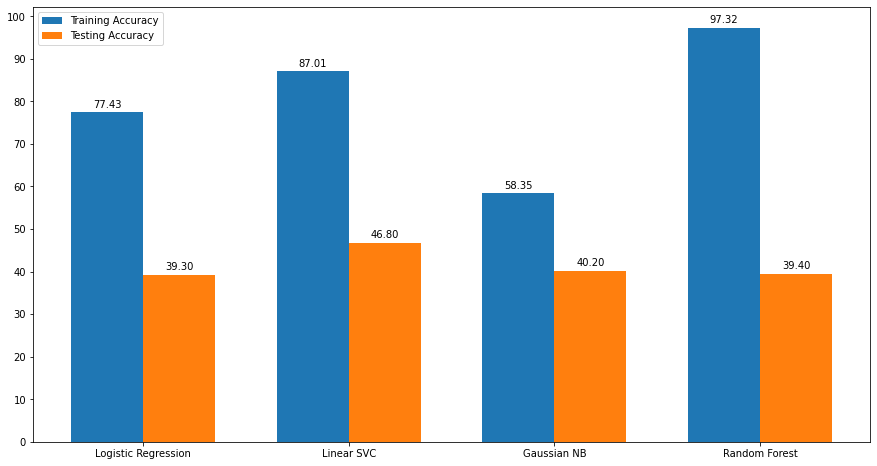

In [ ]:
# Reference : https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/
subjects = ['Logistic Regression', 'Linear SVC', 'Gaussian NB', 'Random Forest']

indx = np.arange(len(subjects))
score_label = np.arange(0, 110, 10)

bar_width = 0.35


fig, ax = plt.subplots(figsize=(15,8))
barMale = ax.bar(indx - bar_width/2, train_list, bar_width, label='Training Accuracy')
barFemale = ax.bar(indx + bar_width/2, test_list, bar_width, label='Testing Accuracy')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subjects)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.2f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)
  

insert_data_labels(barMale)
insert_data_labels(barFemale)

plt.show()

## **Task2** : Humor Offense Rating

In [ ]:
# Preparing dataset and pre-processing
ft = data['text']
lb = data['offense_rating']

ps = PorterStemmer()
ft = ft.apply(lambda x: x.split())
ft = ft.apply(lambda x : ' '.join([ps.stem(word) for word in x]))
tv = TfidfVectorizer(max_features = 3462)
ft = list(ft)
ft = tv.fit_transform(ft).toarray()


ft_test = test_data['text']
lb_test = test_data['offense_rating']
ft_test = ft_test.apply(lambda x: x.split())
ft_test = ft_test.apply(lambda x : ' '.join([ps.stem(word) for word in x]))
tv2 = TfidfVectorizer(max_features = 3462)
ft_test = list(ft_test)
ft_test = tv2.fit_transform(ft_test).toarray()

In [ ]:
# Linear Regression for Offense Rating
lr = LinearRegression()
lr.fit(ft,lb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Score for Model Performance TASK1(B)
print(lr.score(ft,lb))
print(lr.score(ft_test, lb_test))

0.7633493714511398
-2.0276924628631402e+24


## Reference:

https://towardsdatascience.com/sarcasm-detection-step-towards-sentiment-analysis-84cb013bb6db

https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/